In [1]:
import numpy as np
import scipy.stats as stats


We'll start by defining a function for the Black-Scholes Model to calculate the call option price and then define the Greeks as individual functions.

In [2]:
# Black-Scholes formula for European call option price
def black_scholes(S, X, t, r, sigma, option_type="call"):
    d1 = (np.log(S / X) + (r + (sigma ** 2) / 2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    
    if option_type == "call":
        price = S * stats.norm.cdf(d1) - X * np.exp(-r * t) * stats.norm.cdf(d2)
    elif option_type == "put":
        price = X * np.exp(-r * t) * stats.norm.cdf(-d2) - S * stats.norm.cdf(-d1)
    
    return price, d1, d2


We can now define functions for each of the Greeks based on the Black-Scholes model.

In [3]:
# Delta (Δ)
def delta(S, X, t, r, sigma):
    price, d1, _ = black_scholes(S, X, t, r, sigma)
    return stats.norm.cdf(d1)

# Gamma (Γ)
def gamma(S, X, t, r, sigma):
    price, d1, _ = black_scholes(S, X, t, r, sigma)
    return stats.norm.pdf(d1) / (S * sigma * np.sqrt(t))

# Vega (ν)
def vega(S, X, t, r, sigma):
    price, d1, _ = black_scholes(S, X, t, r, sigma)
    return S * np.sqrt(t) * stats.norm.pdf(d1)

# Theta (Θ)
def theta(S, X, t, r, sigma):
    price, d1, d2 = black_scholes(S, X, t, r, sigma)
    term1 = -(S * stats.norm.pdf(d1) * sigma) / (2 * np.sqrt(t))
    term2 = r * X * np.exp(-r * t) * stats.norm.cdf(d2)
    return term1 - term2

# Rho (ρ)
def rho(S, X, t, r, sigma):
    price, d1, d2 = black_scholes(S, X, t, r, sigma)
    return X * t * np.exp(-r * t) * stats.norm.cdf(d2)


Let's define an example where you have:

Stock Price (S) = 120

Strike Price (X) = 100

Risk-Free Rate (r) = 0.05 (5%)

Time to Expiry (t) = 1 year

Volatility (σ) = 0.20 (20%)

In [4]:
# Define inputs
S = 120     # Stock Price
X = 100     # Strike Price
t = 1       # Time to Expiry (in years)
r = 0.05    # Risk-Free Rate
sigma = 0.20 # Volatility

# Call option price and Greeks
call_price, d1, d2 = black_scholes(S, X, t, r, sigma, option_type="call")

# Display results
print(f"Call Option Price: {call_price:.2f}")
print(f"Delta: {delta(S, X, t, r, sigma):.2f}")
print(f"Gamma: {gamma(S, X, t, r, sigma):.4f}")
print(f"Vega: {vega(S, X, t, r, sigma):.2f}")
print(f"Theta: {theta(S, X, t, r, sigma):.2f}")
print(f"Rho: {rho(S, X, t, r, sigma):.2f}")


Call Option Price: 26.17
Delta: 0.90
Gamma: 0.0075
Vega: 21.60
Theta: -6.23
Rho: 81.41


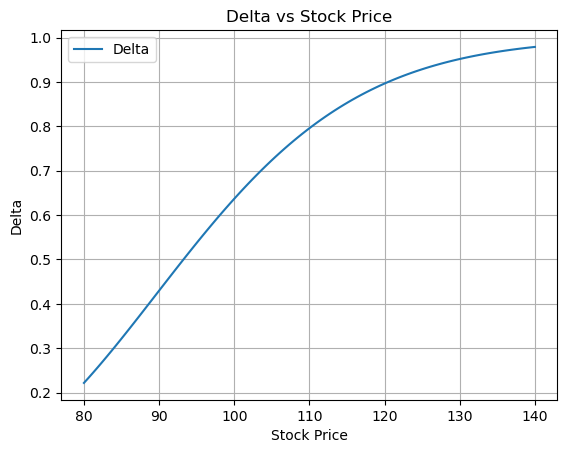

In [5]:
import matplotlib.pyplot as plt

# Range of stock prices
stock_prices = np.linspace(80, 140, 100)
deltas = [delta(s, X, t, r, sigma) for s in stock_prices]

# Plot Delta
plt.plot(stock_prices, deltas, label="Delta")
plt.title("Delta vs Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Delta")
plt.grid(True)
plt.legend()
plt.show()


Visualizing Gamma vs Stock Price

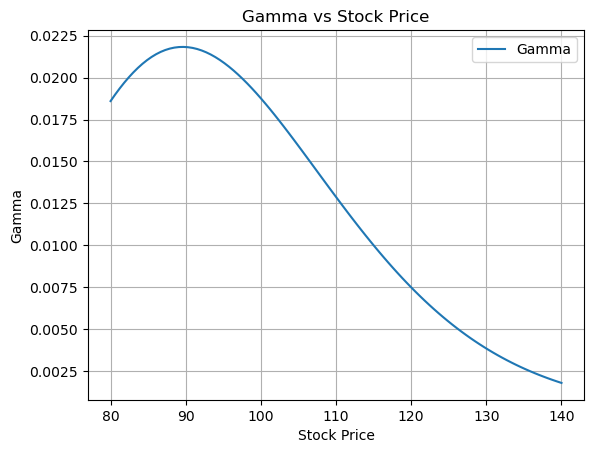

In [7]:
# Visualizing Gamma as a function of Stock Price
gammas = [gamma(s, X, t, r, sigma) for s in stock_prices]  # Gamma as a function of stock price

plt.plot(stock_prices, gammas, label="Gamma")
plt.title("Gamma vs Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Gamma")
plt.grid(True)
plt.legend()
plt.show()


Visualizing Vega vs Stock Price

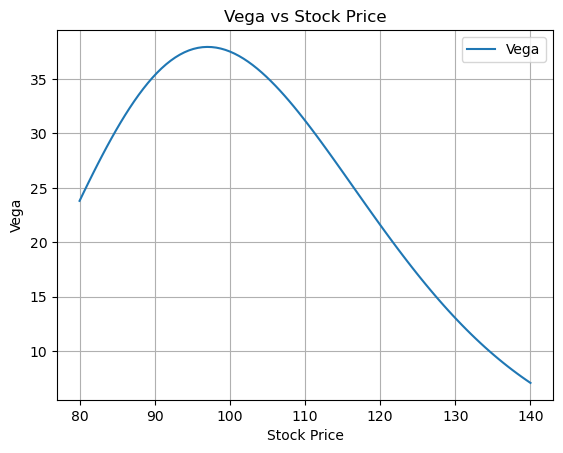

In [8]:
# Visualizing Vega as a function of Stock Price
vegas = [vega(s, X, t, r, sigma) for s in stock_prices]  # Vega as a function of stock price

plt.plot(stock_prices, vegas, label="Vega")
plt.title("Vega vs Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Vega")
plt.grid(True)
plt.legend()
plt.show()


Visualizing Theta vs Stock Price

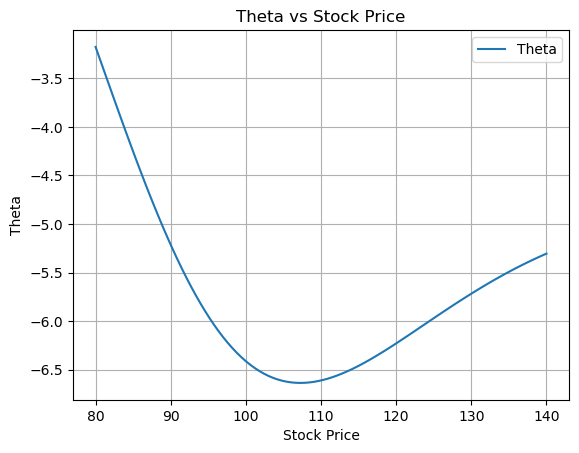

In [9]:
# Visualizing Theta as a function of Stock Price
thetas = [theta(s, X, t, r, sigma) for s in stock_prices]  # Theta as a function of stock price

plt.plot(stock_prices, thetas, label="Theta")
plt.title("Theta vs Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Theta")
plt.grid(True)
plt.legend()
plt.show()


Visualizing Rho vs Stock Price

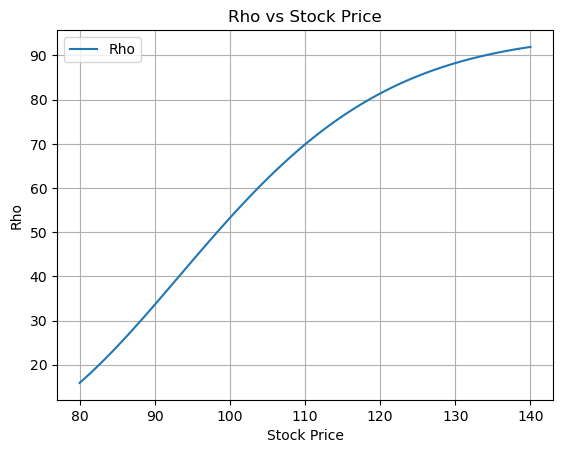

In [10]:
# Visualizing Rho as a function of Stock Price
rho_values = [rho(s, X, t, r, sigma) for s in stock_prices]  # Rho as a function of stock price

plt.plot(stock_prices, rho_values, label="Rho")
plt.title("Rho vs Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Rho")
plt.grid(True)
plt.legend()
plt.show()
